<img style="float: left; padding-right: 20px; width: 700px" src="https://www.businesscol.com/wp-content/uploads/2023/02/seguros-bolivar-logo.png">

**Seguros Bolivar**<br>
**Proyecto: Digital Factory - IA para potenciar el Ciclo de Desarrollo de Software**<br>
**Sección: 6. Soporte y monitoreo**<br>
**Notebook: Modelos de Clasificación para Validación de Datos de Polizas**<br>
**Responsables:**<br>
                VLADIMIR EFREN RECALDE ACHINTE<br>
                MIGUEL ANGEL MORA MIRANDA<br>
                REINEL GAMBOA LOPEZ<br>
                EDILBERTO ELIAS CONTRERAS SIERRA<br>
                
# NOTEBOOK 2: MODELOS DE CLASIFICACIÓN PARA VALIDACIÓN DE DATOS DE PÓLIZAS

### **Introducción**

En este notebook se desarrolla un modelo para la **validación de pólizas** en el sistema de Seguros Bolívar. Este proyecto tiene como objetivo principal detectar de manera automática y eficiente posibles inconsistencias, errores o valores faltantes en los datos asociados a las pólizas.

El enfoque utilizado está basado en la biblioteca **PyCaret**, que permite experimentar con múltiples modelos de aprendizaje supervisado y no supervisado. La idea es evaluar los modelos más adecuados y seleccionar los mejores basados en su desempeño, con la posibilidad de ajustar hiperparámetros para obtener resultados óptimos.

### **Objetivos del Proyecto**
- **Validación de calidad de datos**: Identificar datos faltantes, inconsistencias o errores.
- **Optimización del proceso**: Reducir el tiempo manual de revisión de pólizas.
- **Automatización**: Diseñar un modelo que pueda ser implementado fácilmente en producción.

### **Plan de Trabajo**
1. **Exploración y Preprocesamiento**: Cargar, inspeccionar y limpiar los datos.
2. **Configuración de PyCaret**: Preparar el entorno para la experimentación.
3. **Comparación de Modelos**: Evaluar múltiples algoritmos utilizando métricas estandarizadas.
4. **Selección y Ajuste de Modelos**: Seleccionar los mejores modelos y ajustar sus parámetros.
5. **Evaluación Final**: Comparar los resultados y guardar el modelo final para producción.

## 1: Carga y Exploración Detallada de Datos

En este capítulo, realizaremos una **carga, exploración y análisis inicial** de los datos con el fin de identificar problemas en la estructura, valores faltantes y características relevantes para el análisis.

### 1.1 Carga de los datos

La primera etapa consiste en cargar los datos de entrenamiento y prueba desde archivos CSV. Estos datos contienen las características de las pólizas, como la prima pagada, la edad del cliente, el tipo de cobertura, entre otros.

**Acciones en esta sección:**
- Importar los datos.
- Visualizar las primeras filas para comprobar la estructura y el formato de los datos.

In [14]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

In [15]:
# Cargar datasets
url_train = 'https://raw.githubusercontent.com/MiguelMora-SB/validacion-polizas/main/poc-validacion/Data/Raw/polizas_train_data.csv'
data_train = pd.read_csv(url_train, index_col=0, sep=';', encoding='utf-8-sig')

# Cargar dataset de prueba
url_test = 'https://raw.githubusercontent.com/MiguelMora-SB/validacion-polizas/main/poc-validacion/Data/Raw/polizas_test_data.csv'
data_test = pd.read_csv(url_test, index_col=0, sep=';', encoding='utf-8-sig')

# Mostrar las primeras filas con DataFrame completo
print("\nPrimeras filas del dataset de entrenamiento:")
display(data_train.head())
print("\nPrimeras filas del dataset de prueba:")
display(data_test.head())


Primeras filas del dataset de entrenamiento:


,Prima,Cobertura,Edad_Cliente,Termino_Poliza,Historial_Reclamos,Fecha_Creacion,Estado_Poliza,Region,Genero_Cliente,Tipo_Vehiculo,Valor_Vehiculo,Kilometraje_Anual,Ingresos_Cliente,Dependientes,Riesgo,Fecha_Ultimo_Reclamo,Cobertura_Salud,Monto_Reclamos,Descuento,Anomalia
Numero_Poliza,,,,,,,,,,,,,,,,,,,,
1.0,38079.471766,Estándar,30.0,10.0,1.0,2015-12-10,Cancelada,Sur,Otro,Moto,158164.717878,11151.0,8284.394342,0.0,Bajo,2019-08-05,No,84822.299291,0.135293,0
2.0,95120.716335,Estándar,75.0,5.0,0.0,2021-05-12,Cancelada,Este,Masculino,Carro,11426.591168,27822.0,7504.682004,2.0,Bajo,2010-04-01,Sí,23595.609255,0.153613,0
3.0,73467.400239,Premium,26.0,5.0,1.0,2023-08-20,Vencida,Norte,Femenino,Camión,145891.795455,24549.0,3166.367780,1.0,Alto,2022-08-29,Sí,23433.587381,0.271692,0
4.0,60267.189936,Básica,64.0,5.0,4.0,2021-02-04,Cancelada,Este,Masculino,Camión,242551.490297,46562.0,4701.210134,4.0,Bajo,2011-03-26,Sí,80488.357232,0.164234,0
5.0,16445.845404,Básica,41.0,1.0,3.0,2017-01-16,Vencida,Norte,Masculino,Carro,314660.702410,44015.0,4536.725675,3.0,Medio,2014-12-09,Sí,8533.988020,0.107274,0



Primeras filas del dataset de prueba:


,Prima,Cobertura,Edad_Cliente,Termino_Poliza,Historial_Reclamos,Fecha_Creacion,Estado_Poliza,Region,Genero_Cliente,Tipo_Vehiculo,Valor_Vehiculo,Kilometraje_Anual,Ingresos_Cliente,Dependientes,Riesgo,Fecha_Ultimo_Reclamo,Cobertura_Salud,Monto_Reclamos,Descuento,Anomalia
Numero_Poliza,,,,,,,,,,,,,,,,,,,,
1.0,38079.471766,Básica,33.0,1.0,4.0,2019-08-04,Activa,Oeste,Otro,Carro,347586.396667,17651.0,8936.184861,2.0,Alto,2013-12-09,Sí,64845.497186,0.224799,0
2.0,95120.716335,Básica,39.0,5.0,0.0,2016-04-12,Activa,Este,Femenino,Camión,108287.010416,30625.0,5780.675117,2.0,Alto,2012-10-23,Sí,58594.551188,0.172343,0
3.0,73467.400239,Premium,61.0,1.0,1.0,2022-11-05,Cancelada,Sur,Masculino,Camión,486089.856877,48747.0,8064.241028,2.0,Medio,2018-05-11,No,77779.242436,0.255449,0
4.0,60267.189936,Básica,29.0,1.0,3.0,2018-04-06,Cancelada,Este,Femenino,Moto,267278.886702,9459.0,8946.566003,4.0,Alto,2018-03-11,Sí,78231.803411,0.000681,0
5.0,16445.845404,Premium,60.0,10.0,1.0,2020-10-06,Activa,Oeste,Femenino,Moto,212530.831594,23376.0,7707.269763,3.0,Bajo,2020-03-25,Sí,9433.790466,0.134306,0


### 1.2 Exploración inicial de los datos

El propósito de esta sección es **evaluar la calidad de los datos**. Realizaremos las siguientes acciones:
- Verificar valores faltantes en las columnas.
- Mostrar información de las columnas, como tipos de datos y cantidad de registros.
- Obtener estadísticas descriptivas de las variables numéricas.

In [ ]:
# Resumen de valores faltantes en DataFrame
print("\nResumen de valores faltantes en el dataset de entrenamiento:")
display(data_train.isnull().sum().to_frame(name='Valores_Faltantes'))

print("\nResumen de valores faltantes en el dataset de prueba:")
display(data_test.isnull().sum().to_frame(name='Valores_Faltantes'))

# Información general de las columnas
print("\nInformación de las columnas del dataset de entrenamiento:")
data_train.info()

# Estadísticas descriptivas del dataset de entrenamiento
print("\nEstadísticas descriptivas del dataset de entrenamiento:")
display(data_train.describe())


Resumen de valores faltantes en el dataset de entrenamiento:


,Valores_Faltantes
Numero_Poliza,129
Prima,133
Cobertura,122
Edad_Cliente,101
Termino_Poliza,126
Historial_Reclamos,112
Fecha_Creacion,122
Estado_Poliza,151
Region,135
Genero_Cliente,106



Resumen de valores faltantes en el dataset de prueba:


,Valores_Faltantes
Numero_Poliza,53
Prima,52
Cobertura,49
Edad_Cliente,46
Termino_Poliza,56
Historial_Reclamos,52
Fecha_Creacion,30
Estado_Poliza,48
Region,65
Genero_Cliente,68



Información de las columnas del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Numero_Poliza         99871 non-null   float64
 1   Prima                 99867 non-null   float64
 2   Cobertura             99878 non-null   object 
 3   Edad_Cliente          99899 non-null   float64
 4   Termino_Poliza        99874 non-null   float64
 5   Historial_Reclamos    99888 non-null   float64
 6   Fecha_Creacion        99878 non-null   object 
 7   Estado_Poliza         99849 non-null   object 
 8   Region                99865 non-null   object 
 9   Genero_Cliente        99894 non-null   object 
 10  Tipo_Vehiculo         99865 non-null   object 
 11  Valor_Vehiculo        99878 non-null   float64
 12  Kilometraje_Anual     99864 non-null   float64
 13  Ingresos_Cliente      99840 non-null   float64

,Numero_Poliza,Prima,Edad_Cliente,Termino_Poliza,Historial_Reclamos,Valor_Vehiculo,Kilometraje_Anual,Ingresos_Cliente,Dependientes,Monto_Reclamos,Descuento,Anomalia
count,9.987100e+04,9.986700e+04,9.989900e+04,9.987400e+04,9.988800e+04,9.987800e+04,9.986400e+04,9.984000e+04,9.987600e+04,9.987600e+04,9.986500e+04,100000.000000
mean,1.112546e+209,1.112582e+204,8.786652e+179,1.112513e+208,4.449428e+200,5.562270e+214,5.563010e+198,1.112870e+211,4.449962e+176,1.112475e+225,3.337705e+202,0.050000
std,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.217946
min,1.000000e+00,1.000548e+03,1.800000e+01,1.000000e+00,0.000000e+00,5.011622e+03,5.000000e+03,1.000007e+03,0.000000e+00,3.239175e-01,9.689047e-07,0.000000
25%,2.505150e+04,2.576109e+04,3.300000e+01,1.000000e+00,1.000000e+00,1.287906e+05,1.629375e+04,3.245306e+03,1.000000e+00,2.507288e+04,7.567984e-02,0.000000
50%,5.009400e+04,5.066244e+04,4.900000e+01,5.000000e+00,2.000000e+00,2.535457e+05,2.754300e+04,5.516573e+03,2.000000e+00,5.003260e+04,1.501236e-01,0.000000
75%,7.515550e+04,7.534165e+04,6.400000e+01,1.000000e+01,3.000000e+00,3.774318e+05,3.887025e+04,7.763395e+03,3.000000e+00,7.503677e+04,2.252461e-01,0.000000
max,1.000000e+214,9.999921e+208,7.900000e+184,1.000000e+213,4.000000e+205,4.999936e+219,4.999900e+203,9.999801e+215,4.000000e+181,9.999863e+229,2.999879e+207,1.000000


### 1.3 Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) tiene como objetivo comprender la distribución de las variables clave y encontrar patrones en los datos:
- **Distribución de la variable objetivo**: Evaluar cuántas pólizas tienen anomalías.
- **Distribuciones de variables numéricas**: Visualizar cómo están distribuidos los valores de `Prima` y `Edad_Cliente`.
- **Frecuencia de variables categóricas**: Analizar columnas como `Cobertura` y `Estado_Poliza`.

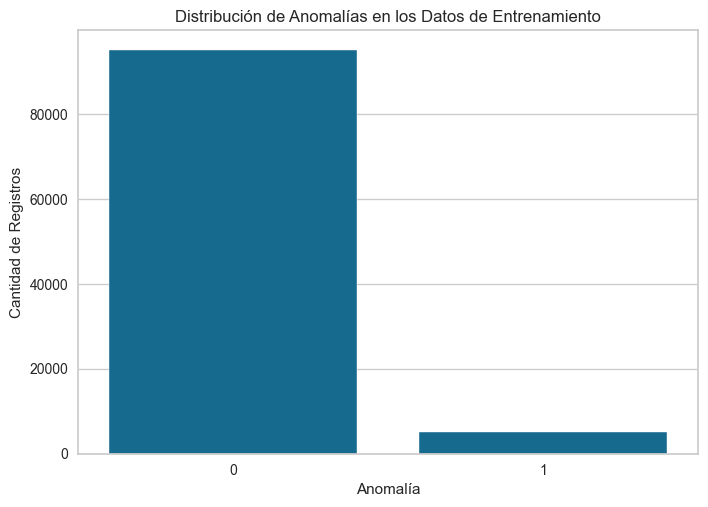

In [ ]:
# Distribución de la variable objetivo
sns.countplot(x='Anomalia', data=data_train)
plt.title("Distribución de Anomalías en los Datos de Entrenamiento")
plt.xlabel("Anomalía")
plt.ylabel("Cantidad de Registros")
plt.show()

In [ ]:
# Valores únicos de columnas categóricas importantes
display(data_train['Cobertura'].value_counts().to_frame(name='Frecuencia'))
display(data_train['Estado_Poliza'].value_counts().to_frame(name='Frecuencia'))

,Frecuencia
Cobertura,
Estándar,33617
Básica,33198
Premium,33063


,Frecuencia
Estado_Poliza,
Vencida,33390
Cancelada,33312
Activa,33147


## 2. Configuración de PyCaret

En este capítulo configuraremos el entorno de **PyCaret**, que automatiza tareas como imputación de valores faltantes, codificación de variables categóricas y escalado de variables numéricas.

### 2.1 Configuración del entorno de PyCaret

Configuramos PyCaret indicando la variable objetivo (`Anomalia`) y el conjunto de datos de entrenamiento.


In [17]:
# Configuración inicial de PyCaret
print("\nConfigurando PyCaret con el dataset de entrenamiento...")
clf_setup = setup(data=data_train, target='Anomalia', session_id=123, index=False)


Configurando PyCaret con el dataset de entrenamiento...


,Description,Value
0,Session id,123
1,Target,Anomalia
2,Target type,Binary
3,Original data shape,"(116512, 20)"
4,Transformed data shape,"(116512, 33)"
5,Transformed train set shape,"(81558, 33)"
6,Transformed test set shape,"(34954, 33)"
7,Numeric features,10
8,Categorical features,9
9,Rows with missing values,2.1%


## 3. Comparación de Modelos

Utilizaremos la función `compare_models` para evaluar múltiples algoritmos y seleccionar los mejores en función de métricas como **precisión** y **F1-score**.



In [ ]:
# Comparar modelos
print("\nComparando modelos...")
best_models = compare_models(n_select=3)

print("\nModelos seleccionados:")
display(best_models)


Comparando modelos...


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:35:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9858,0.0000,0.7171,0.9992,0.8349,0.8277,0.8402,0.8920
catboost,CatBoost Classifier,0.9606,0.0000,0.2363,0.9035,0.3744,0.3612,0.4506,7.1880
lightgbm,Light Gradient Boosting Machine,0.9596,0.0000,0.2171,0.8992,0.3497,0.3368,0.4306,0.5710
lda,Linear Discriminant Analysis,0.9513,0.5327,0.0517,0.6698,0.0957,0.0892,0.1757,0.3430
lr,Logistic Regression,0.9500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8690
qda,Quadratic Discriminant Analysis,0.9500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3340
dummy,Dummy Classifier,0.9500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2540
svm,SVM - Linear Kernel,0.0500,0.0000,1.0000,0.0500,0.0952,0.0000,0.0000,3.0450
nb,Naive Bayes,0.0305,0.0000,0.6091,0.0311,0.0591,-0.0398,-0.6150,0.2920



Modelos seleccionados:


[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0)]

## 4. Selección y Ajuste de Hiperparámetros

Ajustaremos los hiperparámetros del modelo más prometedor para mejorar su desempeño.



In [ ]:
# Ajustar hiperparámetros del mejor modelo
print("\nAjustando hiperparámetros del modelo...")
tuned_model = tune_model(best_models[0])

print("\nModelo ajustado:")
display(tuned_model)


Ajustando hiperparámetros del modelo...


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:38:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,0.0000,0.7257,1.0000,0.8411,0.8341,0.8458
1,0.9859,0.0000,0.7171,1.0000,0.8353,0.8281,0.8406
2,0.9864,0.0000,0.7286,1.0000,0.8430,0.8361,0.8475
3,0.9849,0.0000,0.7000,0.9959,0.8221,0.8145,0.8283
4,0.9856,0.0000,0.7114,1.0000,0.8314,0.8241,0.8371
5,0.9847,0.0000,0.6943,1.0000,0.8196,0.8119,0.8266
6,0.9857,0.0000,0.7171,0.9960,0.8339,0.8266,0.8388
7,0.9849,0.0000,0.6971,1.0000,0.8215,0.8139,0.8284
8,0.9871,0.0000,0.7429,1.0000,0.8525,0.8459,0.8561


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Modelo ajustado:


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

## 5. Evaluación Final

Evaluaremos el modelo ajustado en el conjunto de prueba y revisaremos sus predicciones.


In [ ]:
# Evaluar el modelo en el dataset de prueba
print("\nEvaluando el modelo en los datos de prueba...")
predictions = predict_model(tuned_model, data=data_test)

print("\nPredicciones en los datos de prueba:")
display(predictions.head())


Evaluando el modelo en los datos de prueba...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9840,0.8449,0.6815,0.9993,0.8103,0.8023,0.8184



Predicciones en los datos de prueba:


,Numero_Poliza,Prima,Cobertura,Edad_Cliente,Termino_Poliza,Historial_Reclamos,Fecha_Creacion,Estado_Poliza,Region,Genero_Cliente,...,Ingresos_Cliente,Dependientes,Riesgo,Fecha_Ultimo_Reclamo,Cobertura_Salud,Monto_Reclamos,Descuento,Anomalia,prediction_label,prediction_score
0,1.0,38079.471766,Básica,33.0,1.0,4.0,2019-08-04,Activa,Oeste,Otro,...,8936.184861,2.0,Alto,2013-12-09,Sí,64845.497186,0.224799,0,0,1.0
1,2.0,95120.716335,Básica,39.0,5.0,0.0,2016-04-12,Activa,Este,Femenino,...,5780.675117,2.0,Alto,2012-10-23,Sí,58594.551188,0.172343,0,0,1.0
2,3.0,73467.400239,Premium,61.0,1.0,1.0,2022-11-05,Cancelada,Sur,Masculino,...,8064.241028,2.0,Medio,2018-05-11,No,77779.242436,0.255449,0,0,1.0
3,4.0,60267.189936,Básica,29.0,1.0,3.0,2018-04-06,Cancelada,Este,Femenino,...,8946.566003,4.0,Alto,2018-03-11,Sí,78231.803411,0.000681,0,0,1.0
4,5.0,16445.845404,Premium,60.0,10.0,1.0,2020-10-06,Activa,Oeste,Femenino,...,7707.269763,3.0,Bajo,2020-03-25,Sí,9433.790466,0.134306,0,0,1.0


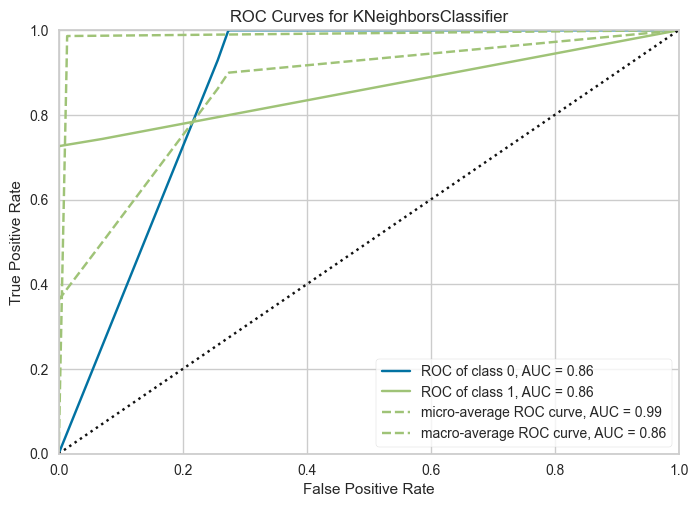

In [ ]:
# Evaluación de la curva ROC del modelo seleccionado
plot_model(tuned_model, plot = 'auc')

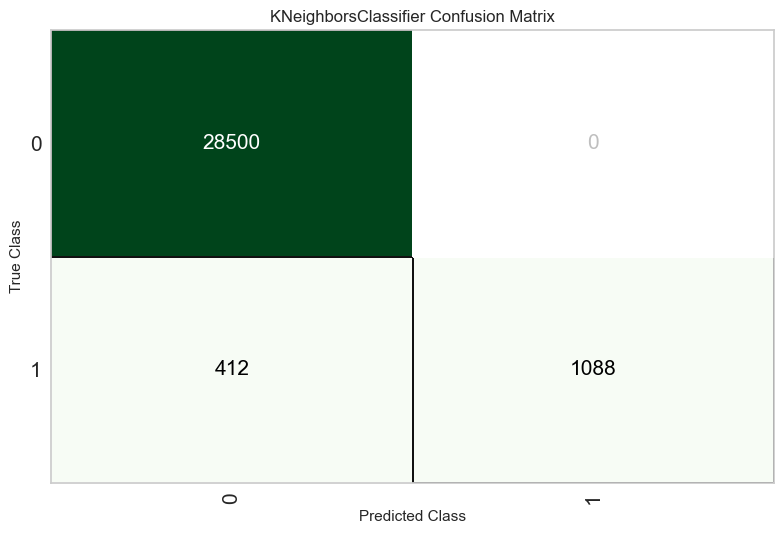

In [ ]:
# Evaluación de la matriz de confusion del modelo seleccionado
plot_model(tuned_model, plot = 'confusion_matrix')

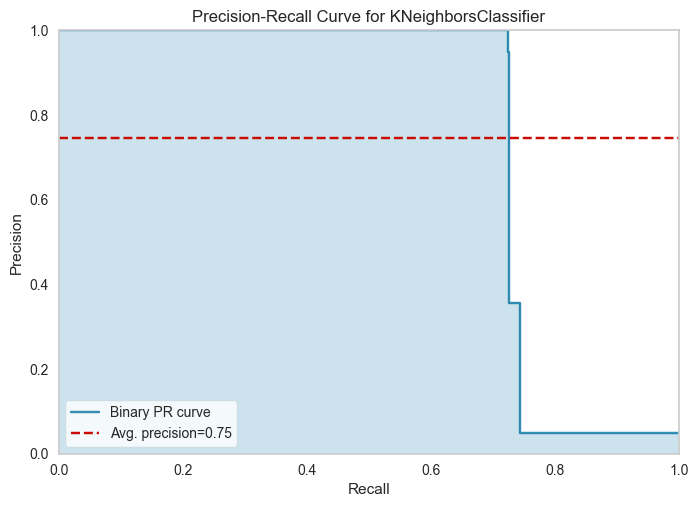

In [ ]:
# Evaluación de la curva de precision-recall del modelo seleccionado
plot_model(tuned_model, plot = 'pr')

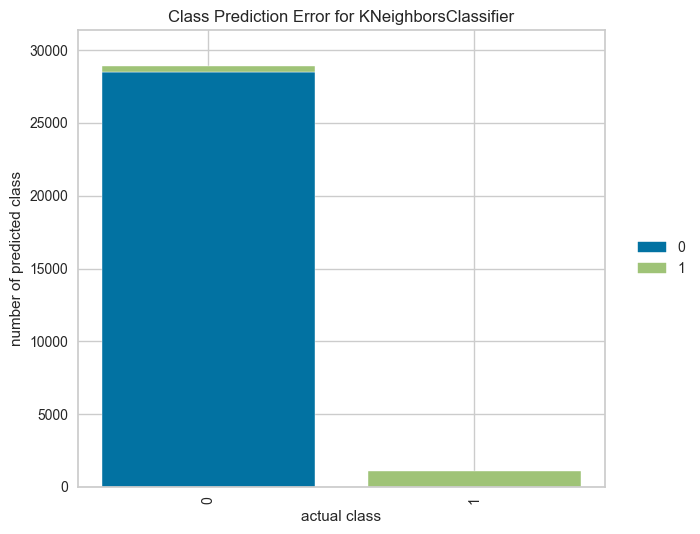

In [ ]:
# Evaluación de la curva de precision-recall del modelo seleccionado
plot_model(tuned_model, plot = 'error')

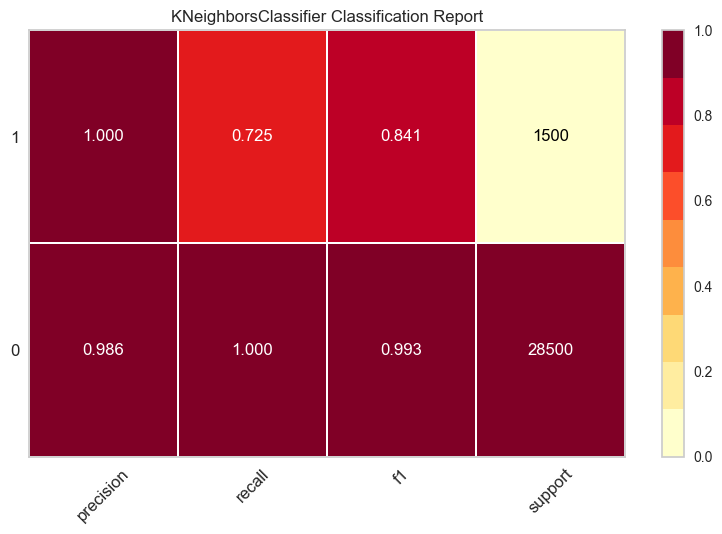

In [ ]:
# Evaluación del reporte por clase del modelo seleccionado
plot_model(tuned_model, plot='class_report')

## 6. Guardado del Modelo Final

Finalmente, guardaremos el modelo entrenado y ajustado para su implementación en producción.

In [ ]:
# # Guardar el modelo final
# print("\nGuardando el modelo final...")
# save_model(tuned_model, 'best_model_validacion_polizas')